# Property features contributing to Prices

Questions to answer:
    
    1.)What are the factors that go into Seattle's Airbnb prices?
    
    2.)Can a reasonable pricing model be made?
    
    3.)How can one maximize the price?

Todo:

    -find features
    
    -build reasonable which would prove both 1.) and 2.)
    
    -use visuals to find possible maximum price for locations in Seattle on platform 

importing packages and ingesting dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('listings.csv')
dcal = pd.read_csv('calendar.csv')
drev = pd.read_csv('reviews.csv')

inspecting all numeric columns in dataframe

In [3]:
df.describe().columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [4]:
drev.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [5]:
drev['id'].unique

<bound method Series.unique of 0        38917982
1        39087409
2        39820030
3        40813543
4        41986501
           ...   
84844    50436321
84845    51024875
84846    51511988
84847    52814482
84848    56429621
Name: id, Length: 84849, dtype: int64>

merge data

In [6]:
dfgx=pd.merge(drev[['id','listing_id']],df,on='id',how='inner')
#dfg=pd.merge(d[['','listing_id']],df,on='id',how='inner')

In [7]:
dfg=pd.merge(dcal[['date','listing_id']],dfgx,on='listing_id',how='inner')

adding target "price" as numeric column

In [8]:
dfg['price'] = dfg['price'].str.replace('$','')
dfg['price'] = dfg['price'].str.replace(',','')
dfg['price'] = dfg['price'].astype(float)

In [9]:
dfg['month'] = pd.DatetimeIndex(dfg['date']).month

get all numeric columns

In [10]:
num_cols= dfg.describe().columns

dataframe with dropped columns with na values

In [11]:
df1 = dfg[num_cols].dropna(axis=1)
df1.shape

(3285, 23)

drop id columns

In [12]:
df1 =df1.drop(['id', 'scrape_id', 'host_id','listing_id'],axis=1)
df1.shape

(3285, 19)

columns for inspection

In [13]:
df1.columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'month'],
      dtype='object')

In [14]:
cor=df1.corr()

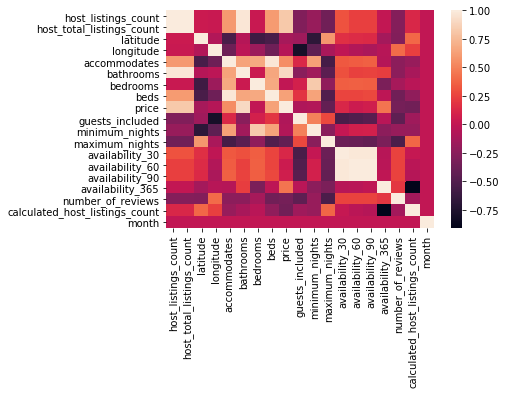

In [15]:
sb.heatmap(cor)

In [16]:
dfx=dfg[['minimum_nights','maximum_nights','availability_365','number_of_reviews','price']]


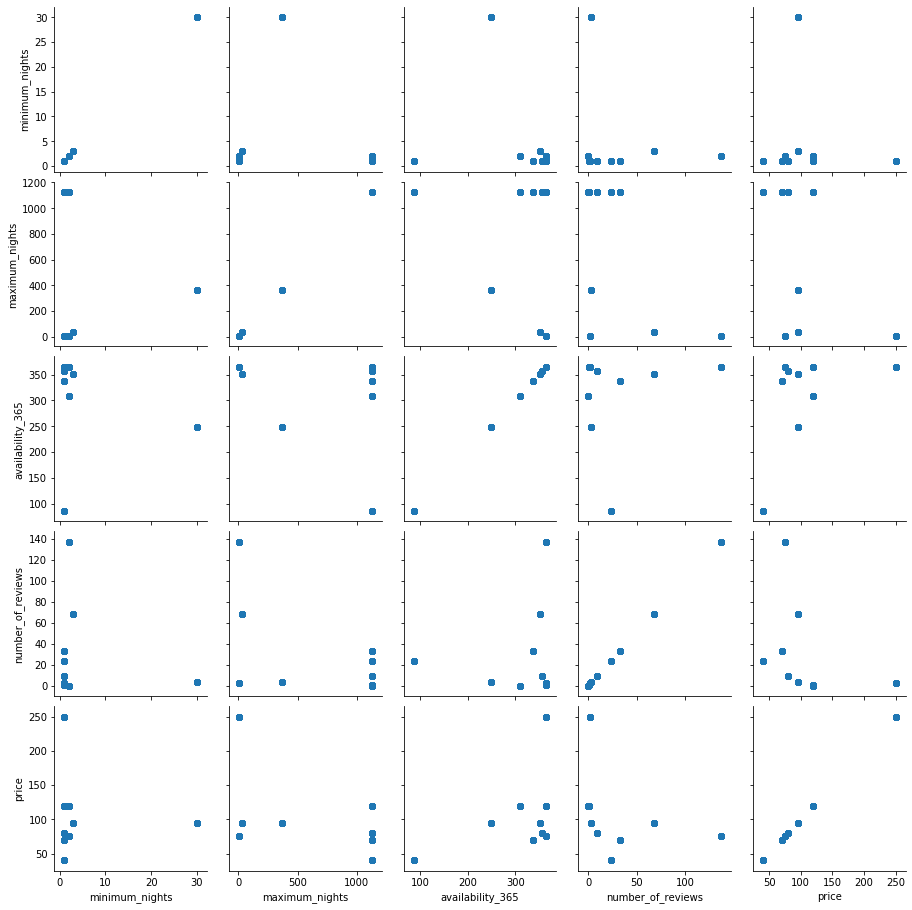

In [17]:
g=sb.PairGrid(dfx)
g.map(plt.scatter)

attempted feature engineering weaker features

C:\Users\aimaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


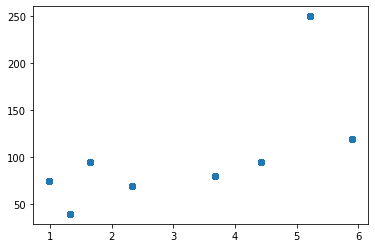

In [18]:
plt.scatter((np.log(dfx['availability_365'].values/dfx['number_of_reviews'].values)),dfx['price'].values)

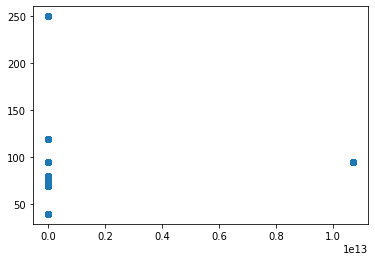

In [19]:
plt.scatter((np.exp(dfx['minimum_nights'].values)),dfx['price'].values)

In [20]:
d=np.log(dfx['availability_365'].values/dfx['number_of_reviews'].values)
dx=pd.DataFrame(d,columns=['av365/numrev']).join(dfx['price'])

C:\Users\aimaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


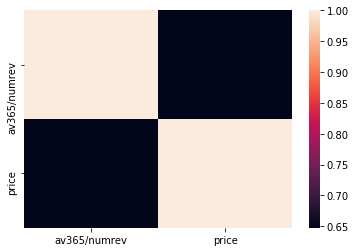

In [21]:
corx=dx.corr()
sb.heatmap(corx)

success, a good variable if need be!

we would like to add "bedrooms"

In [27]:
df.bedrooms[df['bedrooms']=='NAN'].count()

0

In [28]:
#df1 = pd.DataFrame(df.bedrooms).join(dfg)
df1.columns

Index(['host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'month'],
      dtype='object')

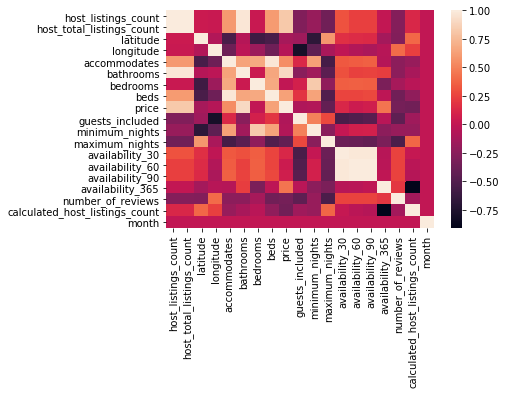

In [29]:
sb.heatmap(df1.corr())

In [30]:
df1=df1.drop(['minimum_nights','maximum_nights','availability_365','number_of_reviews'],axis=1)


In [31]:
df1.shape

(3285, 15)

split data for model validation

In [32]:
from sklearn.model_selection import train_test_split

splitting data of feature with correlations outside of [-0.2,0.2] interval on the heatmap

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df1[['bedrooms', 'accommodates','guests_included','latitude','host_listings_count', 'host_total_listings_count','bathrooms','beds']], df1['price'], test_size=0.20, random_state=42,shuffle=True)

In [34]:
X_test.head()

,bedrooms,accommodates,guests_included,latitude,host_listings_count,host_total_listings_count,bathrooms,beds
2209,1.0,1,1,47.664047,1.0,1.0,1.0,1.0
2770,0.0,2,2,47.678761,1.0,1.0,1.0,1.0
1656,1.0,2,1,47.603388,2.0,2.0,1.0,1.0
1652,1.0,2,1,47.603388,2.0,2.0,1.0,1.0
1451,1.0,6,1,47.613135,84.0,84.0,2.0,3.0


import packages and build model pipeline

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR as svr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr
from xgboost.sklearn import XGBRegressor as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [36]:
pipe = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.NaN,strategy='mean')),
                       ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                       ("Linrs", LinearRegression())])

pipe.fit(X_train.values , y_train.values)
pred = pipe.predict(X_test.values)

evaluation of model to see if it is reasonable and to validate the features which would contribute to 
a Airbnb location in Seattle

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
print(mean_squared_error(y_test,pred),r2_score(y_test,pred))

0.5286844847770736 0.9998248320469456


this is a great model making on average close to $0.50 errors. this also validates the features we used for pricing

/

make visualisations to help us decide how to maximize price

Text(0.5, 1.0, 'price vs beds')

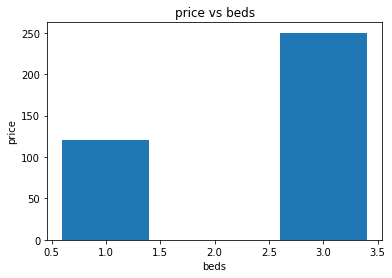

In [39]:
plt.bar(df1.beds.astype(int),df1.price)
plt.xlabel('beds')
plt.ylabel('price')
plt.title('price vs beds')

Text(0.5, 1.0, 'price vs beds')

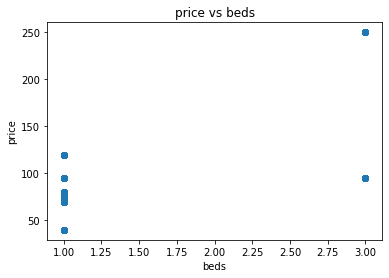

In [40]:
plt.scatter(df1.beds.astype(int),df1.price)
plt.xlabel('beds')
plt.ylabel('price')
plt.title('price vs beds')

Text(0.5, 1.0, 'price vs bathrooms')

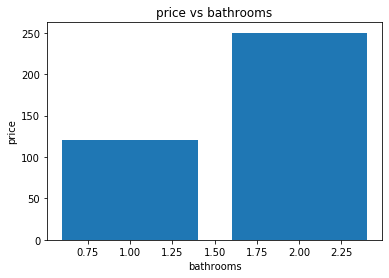

In [41]:
plt.bar(df1.bathrooms.astype(int),df1.price)
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('price vs bathrooms')

Text(0.5, 1.0, 'price vs bathrooms')

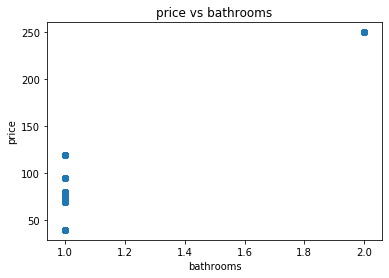

In [42]:
plt.scatter(df1.bathrooms.astype(int),df1.price)
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('price vs bathrooms')

Text(0.5, 1.0, 'price vs bedrooms')

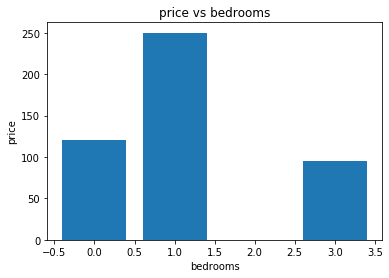

In [43]:
plt.bar(df1.bedrooms,df1.price)
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('price vs bedrooms')

In [44]:
[3,3,2,1,80,80,6,1]

[3, 3, 2, 1, 80, 80, 6, 1]

Text(0.5, 1.0, 'price vs host_listings_count')

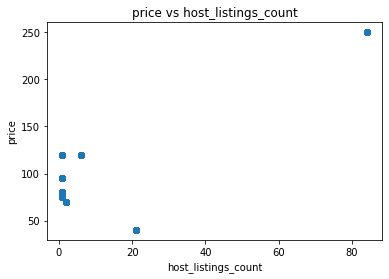

In [45]:
plt.scatter(df1.host_listings_count,df1.price)
plt.xlabel('host_listings_count')
plt.ylabel('price')
plt.title('price vs host_listings_count')

Text(0.5, 1.0, 'price vs host_total_listings_count')

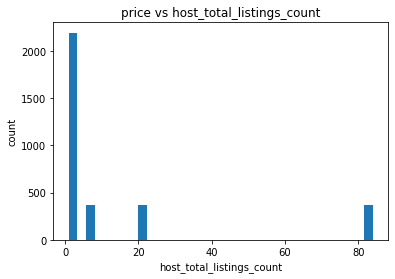

In [46]:
plt.hist(df1.host_listings_count,bins=35)
plt.xlabel('host_total_listings_count')
plt.ylabel('count')
plt.title('price vs host_total_listings_count')

Text(0.5, 1.0, 'price vs host_total_listings_count')

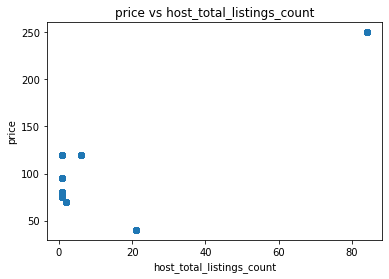

In [47]:
plt.scatter(df1.host_total_listings_count,df1.price)
plt.xlabel('host_total_listings_count')
plt.ylabel('price')
plt.title('price vs host_total_listings_count')

Text(0.5, 1.0, 'price vs latitude')

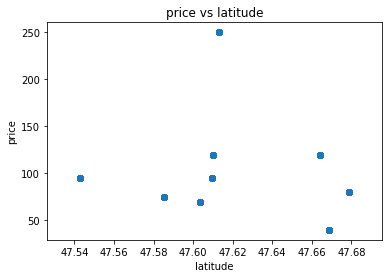

In [48]:
plt.scatter(df1.latitude,df1.price)
plt.xlabel('latitude')
plt.ylabel('price')
plt.title('price vs latitude')

Text(0.5, 1.0, 'price vs accommodates')

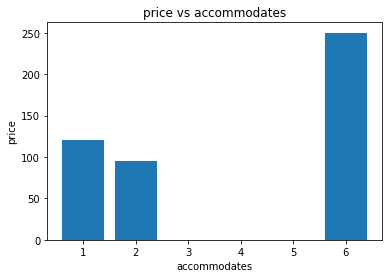

In [49]:
plt.bar(df1.accommodates,df1.price)
plt.xlabel('accommodates')
plt.ylabel('price')
plt.title('price vs accommodates')

Text(0.5, 1.0, 'price vs guests_included')

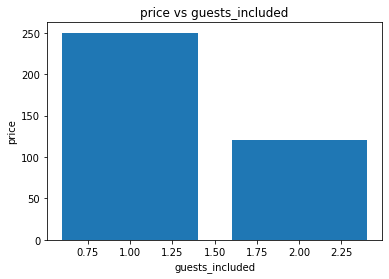

In [50]:
plt.bar(df1.guests_included,df1.price)
plt.xlabel('guests_included')
plt.ylabel('price')
plt.title('price vs guests_included')

this is the array of values for each feature that could maximize price

(['bedrooms':2, 'accommodates':6,'guests_included':1,'latitude':47.61,'host_listings_count':80, 'host_total_listings_count':80,'bathrooms':3,'beds':3])

maximizing

In [51]:
maymax=pipe.predict(np.array([2,6,1,47.61,80,80,3,3]).reshape(1,-1))
print(maymax)

[468.1079033]


In [52]:
df1.price.max()

250.0

success so by merely using the visual maximums we had an increase of (in percent):

In [53]:
((maymax-df1.price.max())/df1.price.max())*100

array([87.24316132])

So, great! we answered everything! found the features that go into an possible Airbnb pricing model, we built said model 
and figured out how to maximize this for the platform.  

--------------<:)----------------